In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import *

df_total = pd.read_excel("port_11.xlsx")

#df_raw1 extracts columns B-F from the data sheet
df_raw1 = df_total[["Time_submitted", "Reaction time_1 (ms)", "Reaction time_2 (ms)", "Typing Speed (wpm)", "Quiz scores "]]

#df_raw2 extracts the other part of the data sheet
df_raw2 = df_total[["Reaction time_1_Submitted Before (ms)", "Reaction time_1_Submitted After (ms)", "Reaction time_2_Submitted Before (ms)", "Reaction time_2_Submitted After (ms)", "Typing Speed_High Quiz Scores (wpm)", "Typing Speed_Low Quiz Scores (wpm)"]]

In [2]:
# Calculate sample size and sample standard deviation
n = len(df_raw1["Reaction time_1 (ms)"])
sample_std = np.std(df_raw1["Reaction time_1 (ms)"], ddof=1)

# Calculate chi-square critical values
alpha = 1 - 0.95
chi2_lower = chi2.ppf(alpha / 2, df=n - 1)
print(f'Chi square (0.025, 23) is {chi2_lower}')
chi2_upper = chi2.ppf(1 - alpha / 2, df=n - 1)
print(f'Chi square (0.975, 23) is {chi2_upper}')

# Calculate the confidence interval
interval_lower = np.sqrt((n - 1) * sample_std**2 / chi2_upper)
print(f'Lower limit of the interval estimate is {interval_lower}')
interval_upper = np.sqrt((n - 1) * sample_std**2 / chi2_lower)
print(f'Upper limit of the interval estimate is {interval_upper}')

Chi square (0.025, 23) is 12.401150217444439
Chi square (0.975, 23) is 39.36407702660391
Lower limit of the interval estimate is 54.30534543400699
Upper limit of the interval estimate is 96.7523746433592


In [9]:
before_deadline_data = df_raw2["Reaction time_1_Submitted Before (ms)"].drop(labels=range(12,25))
after_deadline_data = df_raw2["Reaction time_1_Submitted After (ms)"].drop(labels=range(13,25))

print(before_deadline_data)

0     292.0
1     273.0
2     259.0
3     322.0
4     307.0
5     269.0
6     299.0
7     431.0
8     323.0
9     278.0
10    263.0
11    438.0
Name: Reaction time_1_Submitted Before (ms), dtype: float64


In [11]:
variance1 = np.var(before_deadline_data, ddof=1)
variance2 = np.var(after_deadline_data, ddof=1)

f_value = variance1 / variance2
print(f"The F-stats is {f_value}")

The F-stats is 0.7568199452209394


In [12]:
df_num = len(before_deadline_data) - 1
df_den = len(after_deadline_data) - 1

# Perform F-test
p_value = f.cdf(f_value, df_num, df_den)

# Set the significance level (alpha)
alpha = 0.10

# Print the results
print(f'p-value: {p_value}')

p-value: 0.3257958251191016


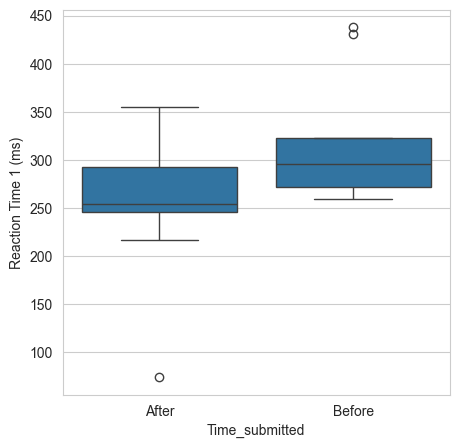

In [7]:
# Create a Box and Whisker plot to visually compare the spread of the two populations.
plt.figure(figsize=(5,5))
sns.boxplot(x='Time_submitted', y='Reaction time_1 (ms)', data=df_raw1)
plt.ylabel('Reaction Time 1 (ms)')
plt.show()

In [15]:
variance1 = np.var(df_raw2["Reaction time_2_Submitted Before (ms)"], ddof=1)
variance2 = np.var(df_raw2["Reaction time_2_Submitted After (ms)"], ddof=1)

f_value = variance1 / variance2
print(f"The F-stat for this hypothesis test is {f_value}")

The F-stat for this hypothesis test is 0.4351373978609936


In [16]:
df_num = len(before_deadline_data) - 1
df_den = len(after_deadline_data) - 1

# Perform F-test
p_value = f.cdf(f_value, df_num, df_den)

# Set the significance level (alpha)
alpha = 0.10

# Print the results
print(f'The p-value for this hypothesis test is {p_value}')

The p-value for this hypothesis test is 0.08945160984984463


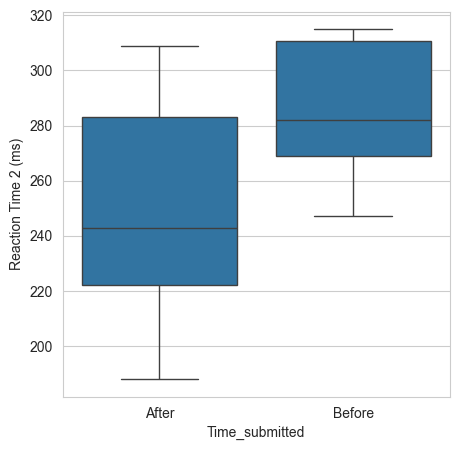

In [17]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Time_submitted', y='Reaction time_2 (ms)', data=df_raw1)
plt.ylabel('Reaction Time 2 (ms)')
plt.show()

In [21]:
# The variance Typing Speed for those who received high scores on the quiz is the same as to the variance in Typing Speed for those who received low quiz scores.

variance1 = np.var(df_raw2["Typing Speed_Low Quiz Scores (wpm)"], ddof=1)
variance2 = np.var(df_raw2["Typing Speed_High Quiz Scores (wpm)"], ddof=1)

f_value = variance1 / variance2
print(f"The F-stat of this hypothesis test is {f_value}")

The F-stat of this hypothesis test is 0.8491174085058169


In [22]:
df_num = len(before_deadline_data) - 1
df_den = len(after_deadline_data) - 1

# Since this is a two-tailed test, we need to double the p-value
p_value = f.cdf(f_value, df_num, df_den) * 2

# Set the significance level (alpha)
alpha = 0.10

# Print the results
print(f'The p-value of this hypothesis test is: {p_value}')


The p-value of this hypothesis test is: 0.7933296666008638


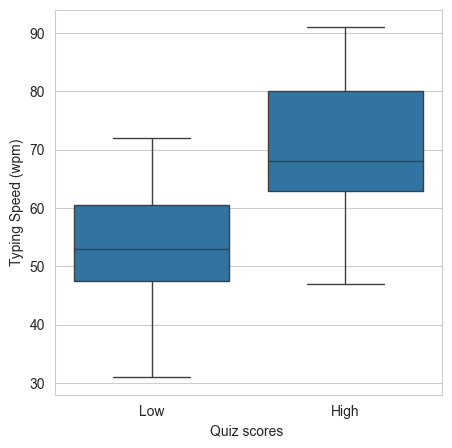

In [18]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Quiz scores ', y='Typing Speed (wpm)', data=df_raw1)
plt.ylabel('Typing Speed (wpm)')
plt.show()